In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [39]:
df = pd.read_csv('water_potability.csv')

In [40]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [41]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Data Preparation

In [42]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# fill missing value in ph

In [44]:
ph_missing = ['6.52', '6.83']

df['ph'] = df['ph'].fillna(pd.Series(np.random.choice(ph_missing, size= len(df.index) + 2000)))
df.ph.isnull().sum()

0

# fill missing value in sulfate

In [45]:
sulfate_missing = ['400', '500']

df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df.Sulfate.isnull().sum()


0

# fill missing value in Trihalomethanes

In [46]:
df[(df['Trihalomethanes'] < 10)]

ths_missing = ['10', '20', '30', '40', '50', '60', '70', '80']

df['Trihalomethanes'] = df['Trihalomethanes'].fillna(pd.Series(np.random.choice(ths_missing, size= len(df.index) + 2000)))

df['Trihalomethanes'].isnull().sum()

0

In [47]:
def checking_missing_value(df):
    
    m = df.isna().sum()
    total = int(df.shape[0])

    for i in range(len(df.columns)):
        percentage = round((m[i]/total)*100)

        print(str(df.columns[i]) + ' has ' + str(percentage) +
              ' % missing value(' + str(m[i]) + ')')

checking_missing_value(df)

ph has 0 % missing value(0)
Hardness has 0 % missing value(0)
Solids has 0 % missing value(0)
Chloramines has 0 % missing value(0)
Sulfate has 0 % missing value(0)
Conductivity has 0 % missing value(0)
Organic_carbon has 0 % missing value(0)
Trihalomethanes has 0 % missing value(0)
Turbidity has 0 % missing value(0)
Potability has 0 % missing value(0)


# Exploratory Data

In [48]:
df.corr()

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
Hardness,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.014449,-0.013837
Solids,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,0.019546,0.033743
Chloramines,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.002363,0.023779
Sulfate,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.009790,-0.020619
Conductivity,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.005798,-0.008128
Organic_carbon,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.027308,-0.030001
Turbidity,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,1.000000,0.001581
Potability,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.001581,1.000000


In [49]:
df.describe()

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,3.966786,0.390110
std,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,0.780382,0.487849
min,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,1.450000,0.000000
25%,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,3.439711,0.000000
50%,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,3.955028,0.000000
75%,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,4.500320,1.000000
max,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,6.739000,1.000000


In [50]:
df['ph'] = pd.to_numeric(df['ph'])

In [51]:
df['Sulfate'] = pd.to_numeric(df['Sulfate'])
df['Trihalomethanes'] = pd.to_numeric(df['Trihalomethanes'])

In [52]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075400,-0.082372,-0.030557,0.011656,0.020265,0.041690,0.001305,-0.034991,-0.000220
Hardness,0.075400,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.001506,-0.014449,-0.013837
Solids,-0.082372,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.019287,0.019546,0.033743
Chloramines,-0.030557,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.017121,0.002363,0.023779
Sulfate,0.011656,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.023160,-0.009790,-0.020619
Conductivity,0.020265,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.008552,0.005798,-0.008128
Organic_carbon,0.041690,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.013271,-0.027308,-0.030001
Trihalomethanes,0.001305,-0.001506,-0.019287,0.017121,-0.023160,0.008552,-0.013271,1.000000,-0.023481,0.017515
Turbidity,-0.034991,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.023481,1.000000,0.001581
Potability,-0.000220,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.017515,0.001581,1.000000


In [53]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Pure vs Contaminated Water

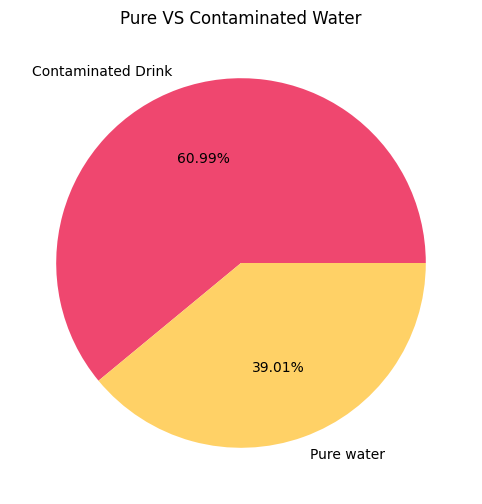

In [54]:
fig, ax = plt.subplots(figsize = (12,6))

plt.title('Pure VS Contaminated Water')
plt.pie(df['Potability'].value_counts(), autopct = '%0.2f%%', labels = ['Contaminated Drink', 'Pure water'], colors=['#ef476f', '#ffd166'])
plt.show()

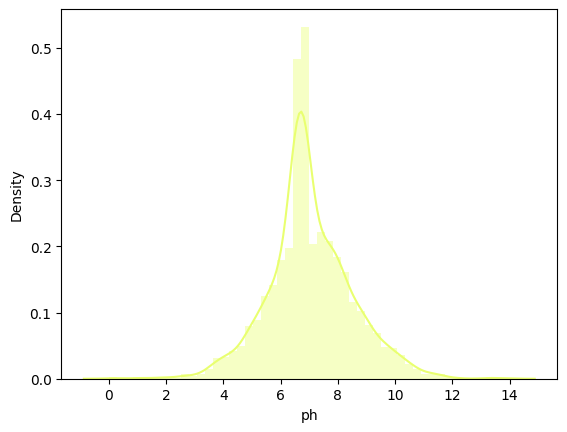

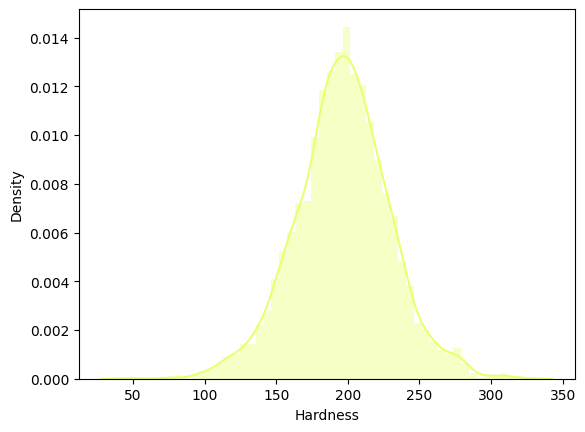

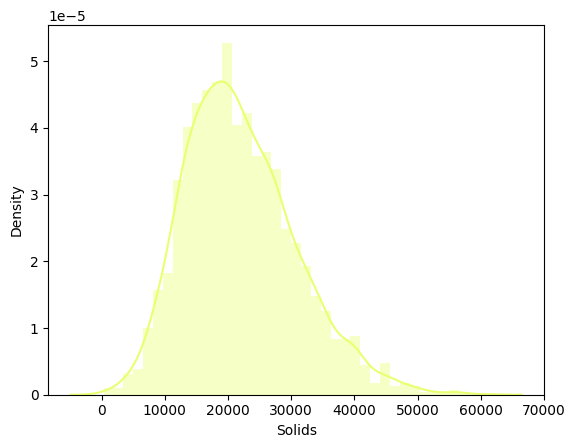

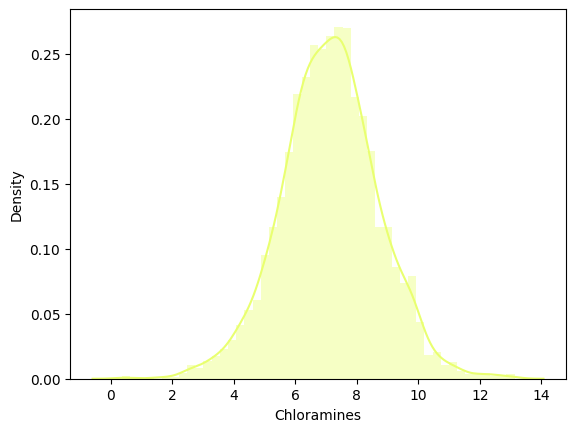

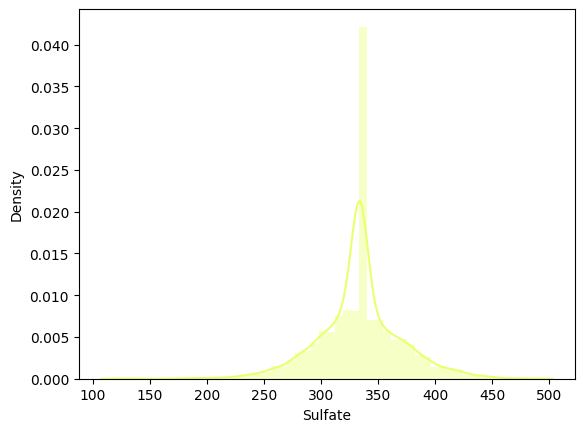

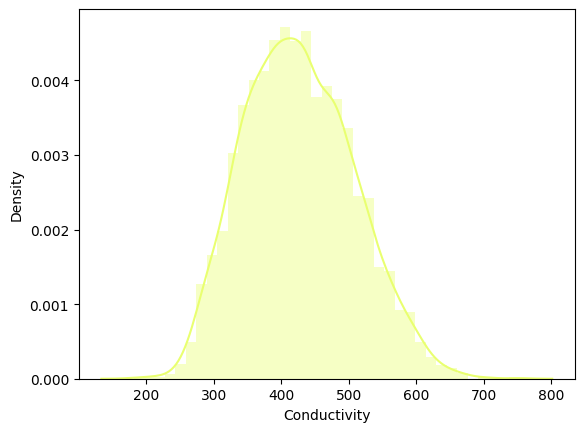

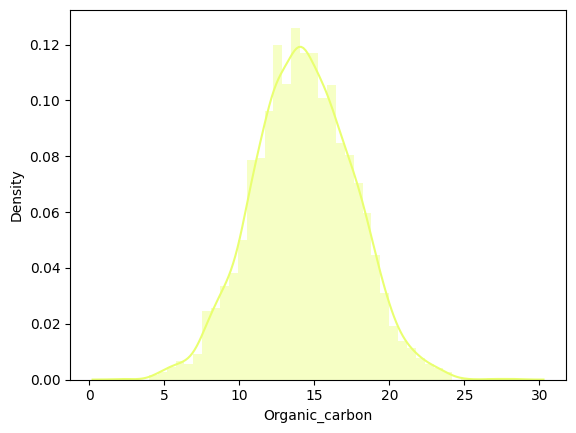

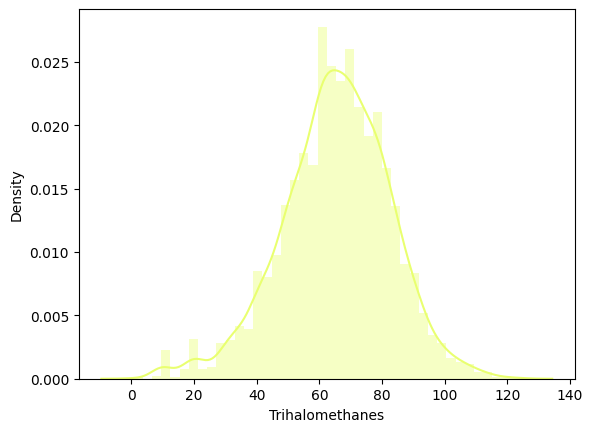

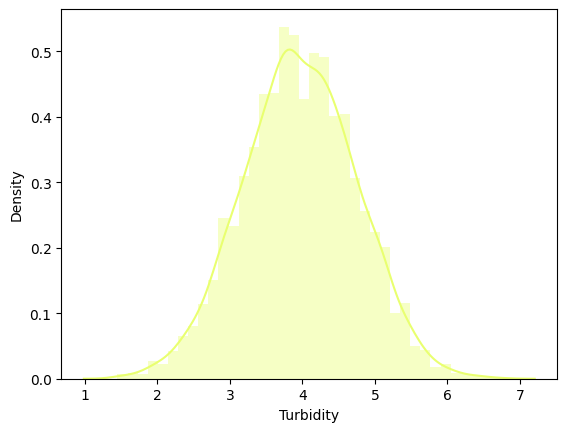

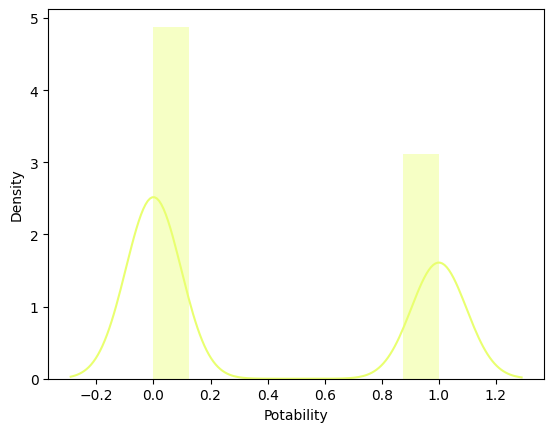

<Figure size 640x480 with 0 Axes>

In [57]:
# fig, ax = plt.subplots(3, 3, figsize = (15,8))

for i in df.columns:
    sns.distplot(df[i], color='#e9ff70')
    plt.figure()

# Correlation Analysis

<Axes: >

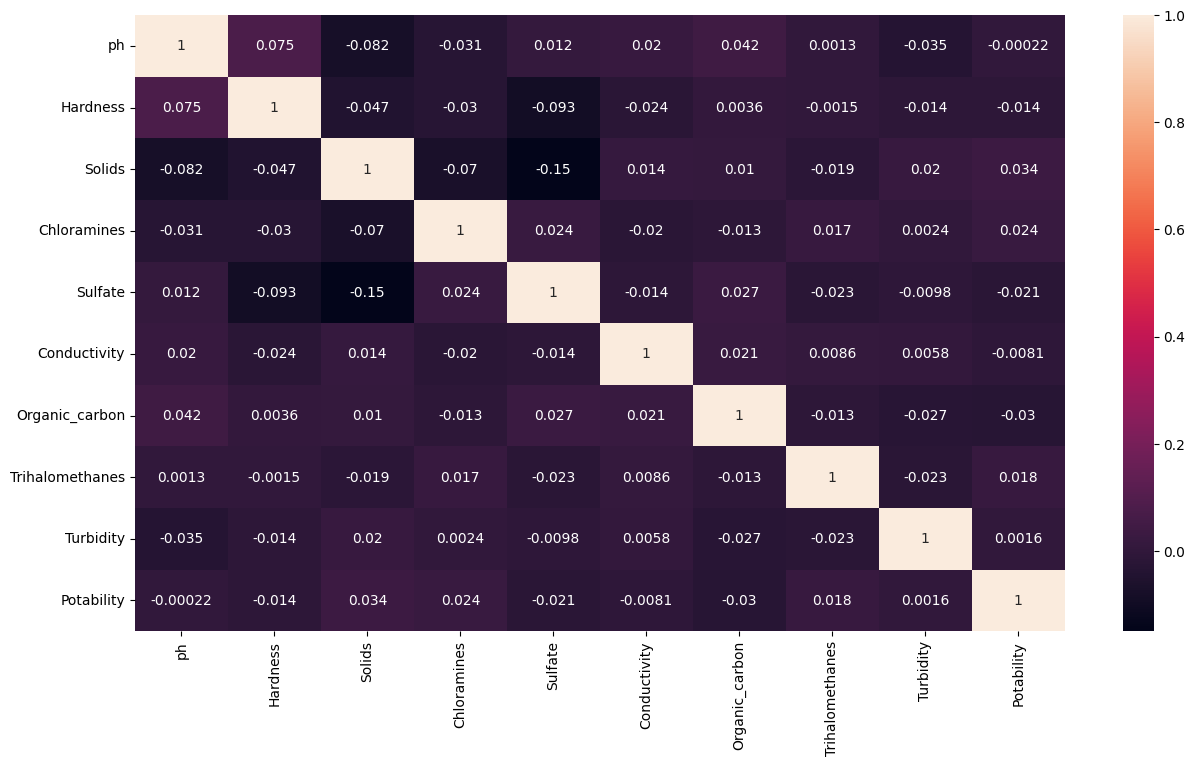

In [59]:
fig = plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), annot=True)